# Scrapy爬虫框架

# 1. Scrapy 简介

① Scrapy是一个为了爬取网站数据，提取结构性数据而编写的应用框架，我们只需要实现少量代码，就能够快速的抓取数据内容。

② Scrapy 使用了 $Twisted['twistid']$ (其主要对手是$Tormado$) 异步网络架构来处理网络通讯，可以加快我们的下载速度，不用自己去实现异步架构，并且包含了各种中间件接口，可以灵活的完成各种需求。

# 2. 异步(阻塞)与非阻塞的区别

① 异步：掉调用在发出之后，这个个调用就直接放回，不管有无结果。

② 非阻塞：关注的是程序在等待调用结果(消息，返回值)时的状态，指在不能立即得到结果之前，该调用不会阻塞当前线程。

③ 异步比非阻塞的速度要快一些。

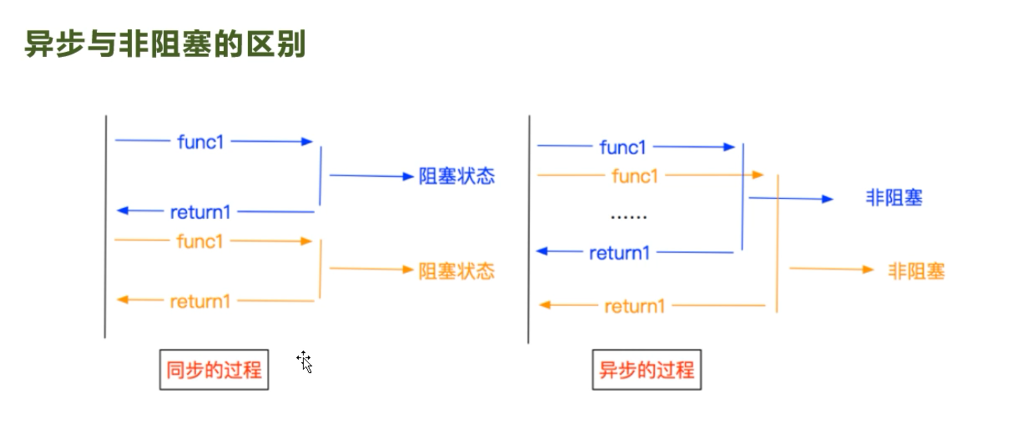

# 3. 安装Scrapy框架

① 在 anaconda prompt 中用 pip 安装scrapy，直接从国内的镜像安装，速度快。

② anaconda prompt 中，输入下面语句：

In [ ]:
pip install scrapy -i http://pypi.douban.com/simple --trusted-host pypi.douban.com                       

① 导入 scrapy 包没有报错，说明安装成功，print(scrapy.__version__) 可获得安装的 scrapy 的版本号。

In [1]:
import scrapy
print(scrapy.__version__)

2.4.1


# 4. Scrapy爬取豆瓣数据

## 4.1 命令行创建蜘蛛Spider

① 进入命令行界面，进入想创建Scrapy项目的目录下。

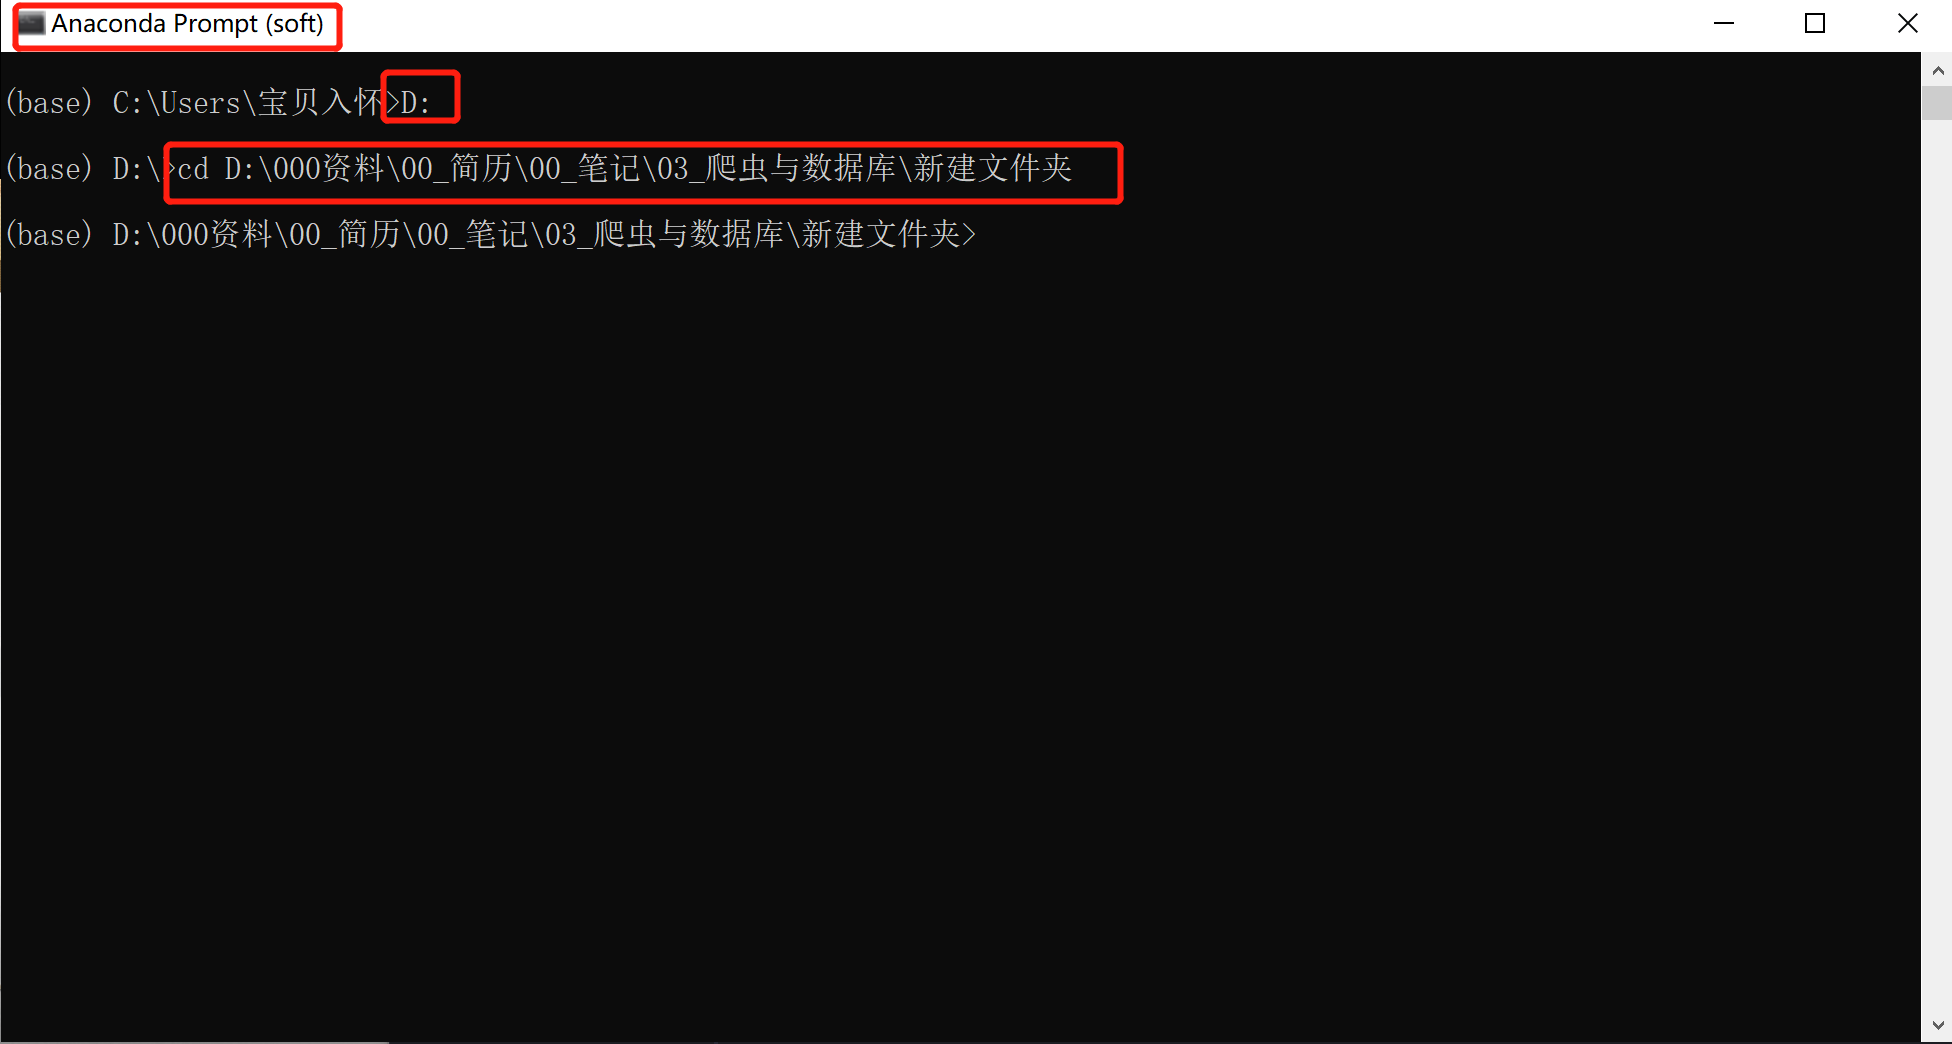

② scrapy startproject 项目名(例如：scrapy startproject firstscrapy)，会创建一个scrapy项目。

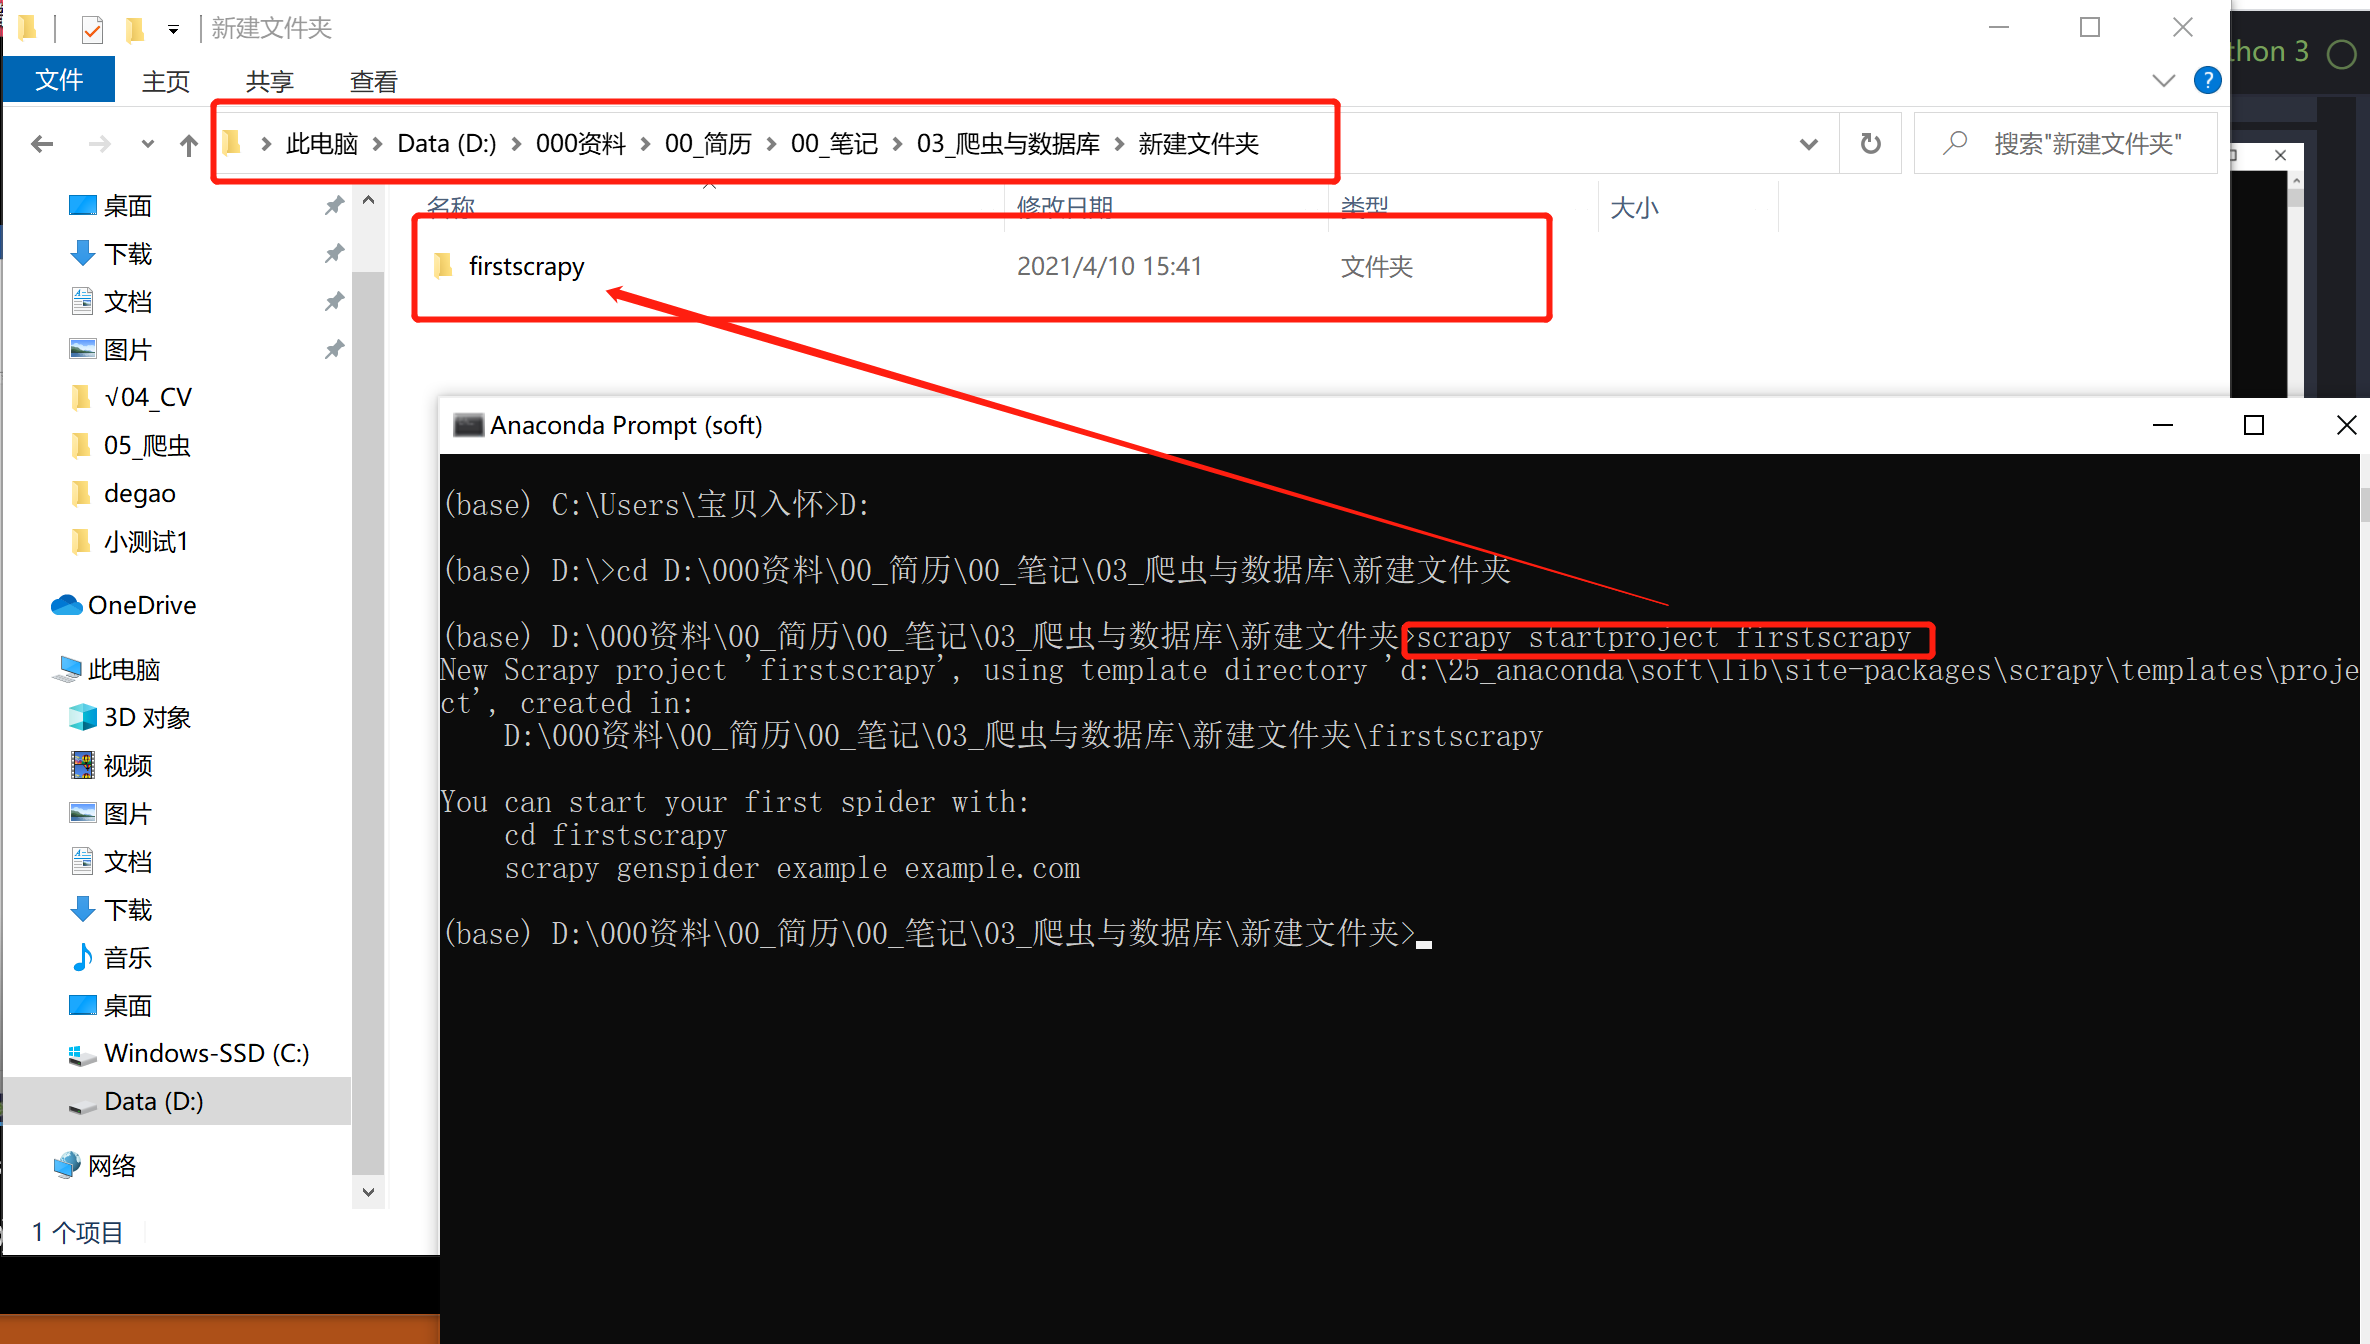

③ cd firstscrapy，进入firstscrapy文件夹内。

④ scrapy genspider 蜘蛛名字 爬取网站域名（例如：scrapy genspider douban movie.douban.com），会创建一个爬虫蜘蛛spider，并且会产生一系列文件。

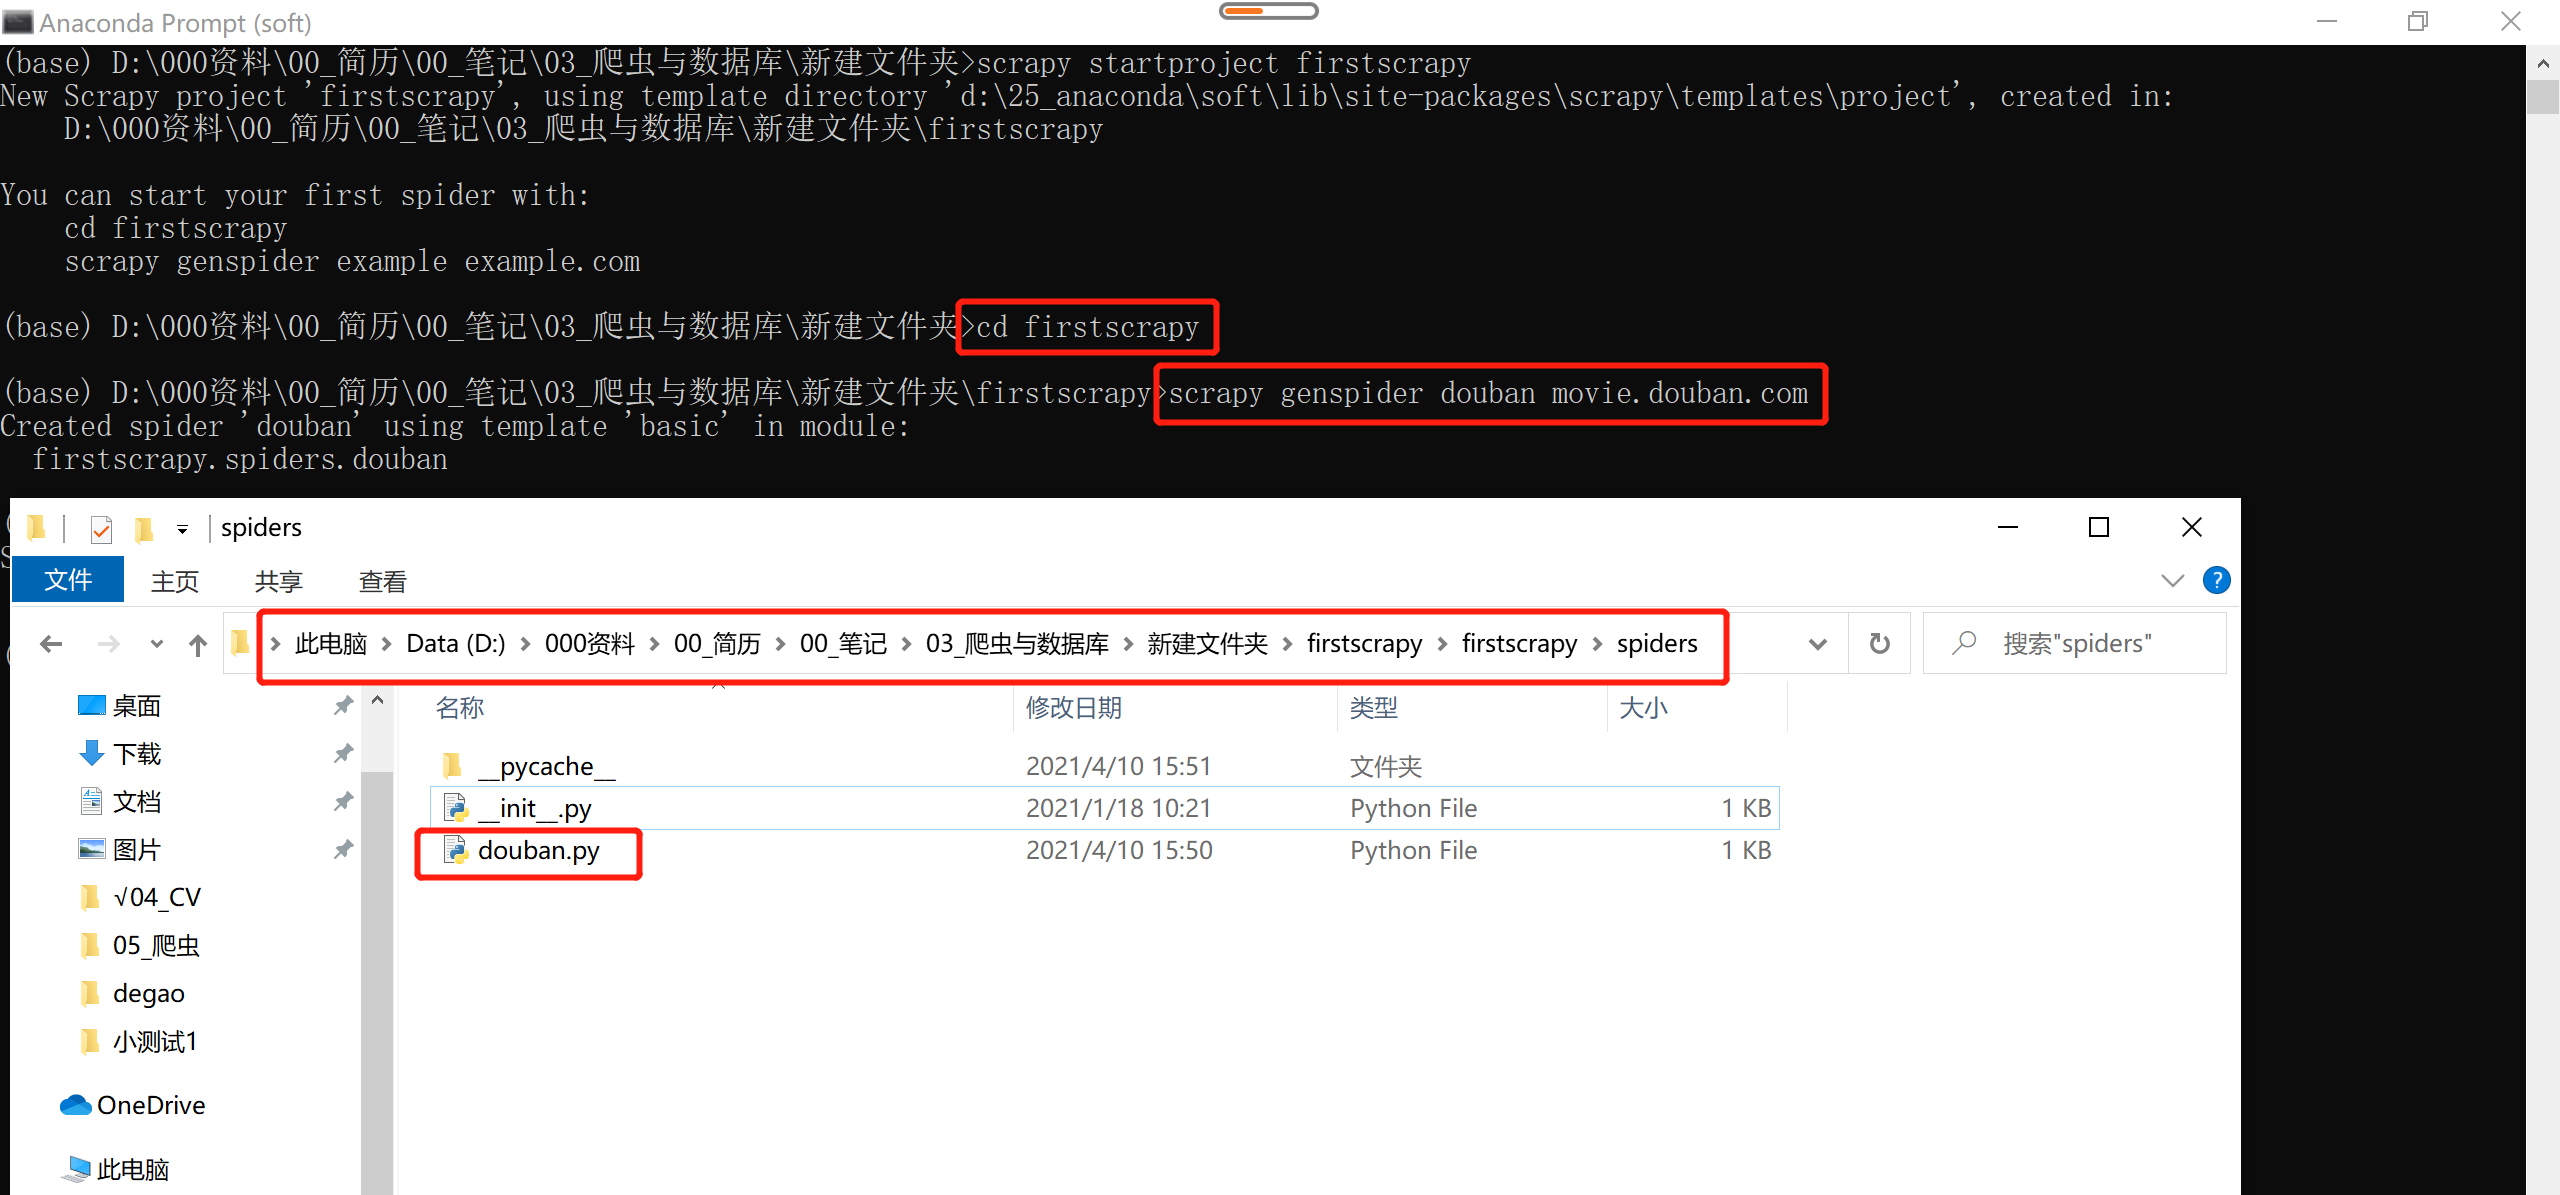

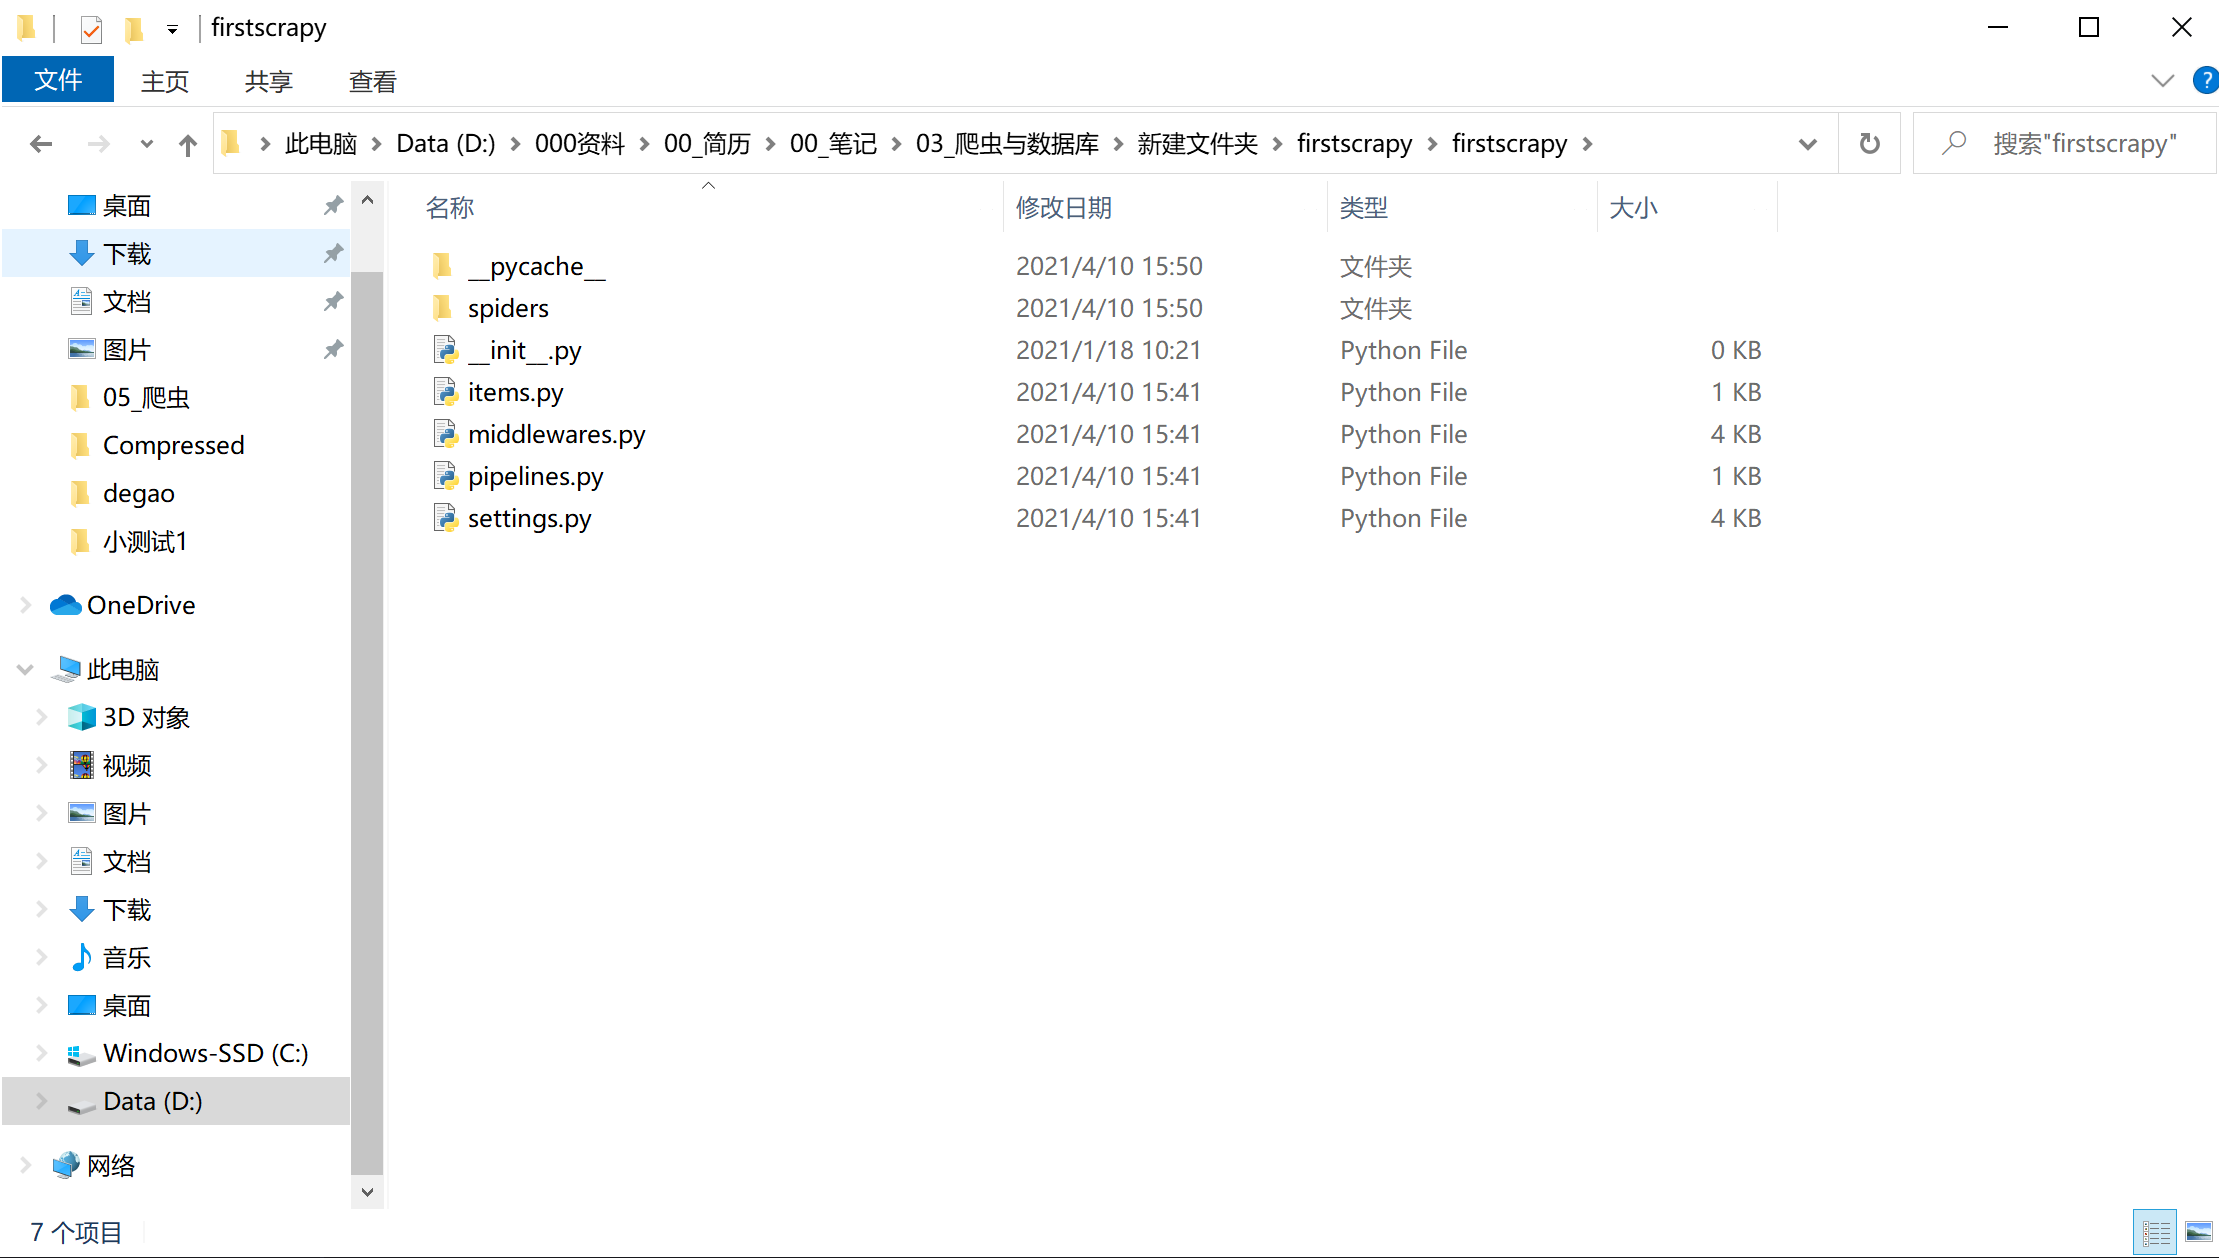

## 4.2 修改items.py文件

① 对items.py文件进行修改

In [ ]:
# 这是items.py文件(定义爬虫信息字段)

import scrapy

class FirstscrapyItem(scrapy.Item):
    # 要爬哪些东西，字段
    id1 = scrapy.Field()  # 实例化对象，对象名是自己定义的
    title = scrapy.Field() # scrapy.Field()这个类继承的是字典类
    actors = scrapy.Field() 
    score = scrapy.Field()
    types = scrapy.Field()
    rank = scrapy.Field()
    release_date = scrapy.Field()
    cover_url = scrapy.Field()

## 4.3 修改douban.py文件

① douban.py文件有三个属性：name、allowed_domains、start_urls，和一个方法 parse。
1. name，它是每个项目唯一的名字，用来区分不同的Spider。
2. allowed_domains，它是允许爬取的域名，如果初始或后续的请求链接不是这个域名下的，则请求链接会被过滤掉。
3. start_urls，它包含了Spider在启动时爬取的url列表，初始请求是由它来定义的。
4. parse，它是Spider的一个方法。默认情况下，被调用时start_urls里面的链接构成的请求完成下载执行后，返回的响应就会作为唯一的参数传递给这个函数。该方法负责解析返回的响应、提取数据或者进一步生成要处理的请求。

In [ ]:
# 这是 douban.py 文件

import scrapy
from firstscrapy.items import FirstscrapyItem #文件里有这个导入这个模块的类      

class DoubanSpider(scrapy.Spider):
    name = 'douban'
    allowed_domain = ['movie.douban.com']
    start_urls = ['https://movie.douban.com/j/chart/top_list?type=24&interval_id=100%3A90&action=&start=0&limit=20']                     
    
    # 解析数据
    def parse(self,response):  # response要在setting.py设置请求头，获得responce          
        datas = response.json() # 这里是json数据，所以json解析的，如果是网页是xhtm数据，就用xpath解析
        for data in datas:
            item = FirstscrapyItem() # 实例化对象
            item['id1'] = data['id']  # item通过json解析得到的，解析的数据存到item里面
            item['title'] = data['title']
            item['actors'] = ','.join([i.replace(r'"','') for i in data['actors']])
            item['score'] = data['score']
            item['types'] = ','.join(data['types'])
            item['rank'] = data['rank']
            item['cover_url'] = data['cover_url']
            yield item # item 会传递下去，item传递到哪里去了，先传给谁，后传给谁，是取看setting.py配置
                       # 这个yield item不能省略，这个item会传递给pipline.py文件，转换的先后安排在setting.py文件
                       # 如果不用yield，而是要等它们全部处理完再返回，更占内存，更耗时

## 4.4 修改setting.py文件

① 对setting.py文件进行修改
1. 在 settings.py 文件中的注释掉的默认请求头打开，并将里面的内容用豆瓣的请求头替换掉，如下图所示。
2. 在 settings.py 文件中将是否遵守ROBOTST协议改为 False。
3. 可以加多个通道，末尾的变量是类的名字，末尾的值

In [ ]:
# 这是setting.py 文件(设置爬虫配准)

BOT_NAME = 'firstscrapy'

SPIDER_MODULES = ['firstscrapy.spiders']
NEWSPIDER_MODULE = 'firstscrapy.spiders'

# Obey robots.txt rules
ROBOTSTXT_OBEY = False  # 为True表示遵守 ROBOST 协议，为False表示不遵守 ROBOST 协议
                        # ROBOST 协议即别人不允许你爬的，你爬的话会自动报错。

DEFAULT_REQUEST_HEADERS = {
"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36"
}
# 这里用的是豆瓣头文件覆盖的原内容

ITEM_PIPELINES = {
    'firstscrapy.pipelines.SaveTxt': 301, #  SaveTxt 为 douban.py 中的 item 要传入 pipelines.py 的类名
    'firstscrapy.pipelines.SaveCsv': 302, # 301,302数值为多少没有影响，但是谁大谁小有影响，数值小的，先运行，先进入该类         
}

## 4.5 修改pipelines.py文件

In [ ]:
# 这是pipelines.py(保存解析后的数据【保存到文件或者数据库】)

from itemadapter import ItemAdapter
import csv

class SaveTxt:
    def __init__(self):
        self.text_file = 'douban.txt'
        
    def process_item(self,item,spider):
        #print(type(item))     # item为字典类型
        self.write_txt(item)  # 调用write_txt(self)方法
                              # 由于页面有20条电影数据，这里写入txt文件中的就是20条数据                      
        if item['rank']>5:
            return item       # 过滤掉五条数据，返回的15条数据传入SaveCsv，csv只能保存15条数据
                              # 如果没有return，就不会返回给 SaveCsv ，但是由于管道里有数据流要传入SaveCsv，所以会报错             
    
    def write_txt(self,item):
        with open(self.text_file,'a',encoding='utf-8') as f:
            f.write(item['id1']+'\n') # 拼接一个换行符，可以换行                                                                  
            f.write(item['title']+'\n')
            f.write(item['actors']+'\n')
            f.write(item['score']+'\n')
            f.write(item['types']+'\n')
            f.write(str(item['rank'])+'\n')  # 只有变为字符串形式，才能通过+号拼接起来，拼接字符串
            f.write(item['cover_url']+'\n')

        
class SaveCsv:
    def __init__(self):
        self.csv_file = 'douban.csv'
        
    def process_item(self,item,spider):
        #print(type(item))     # item为字典类型
        self.write_csv(item)  
        return item
    
    def write_csv(self,item):
        # csv标准库中的writerow在写入文件时会加入'\r\n'作为换行符。
        # if newline is ''，换行符不会被转化而是直接输出。
        with open(self.csv_file,'a',encoding='utf-8-sig',newline='') as csvf:
            fielnames = ['id1','title','actors','score','types','rank','cover_url']                              
            writer = csv.DictWriter(csvf,fieldnames = fielnames)                                                       
            writer.writerow(item)

## 4.6 命令运行蜘蛛Spider

① 在命令行输入scrapy crawl 蜘蛛名字(例如：scrapy crawl douban)

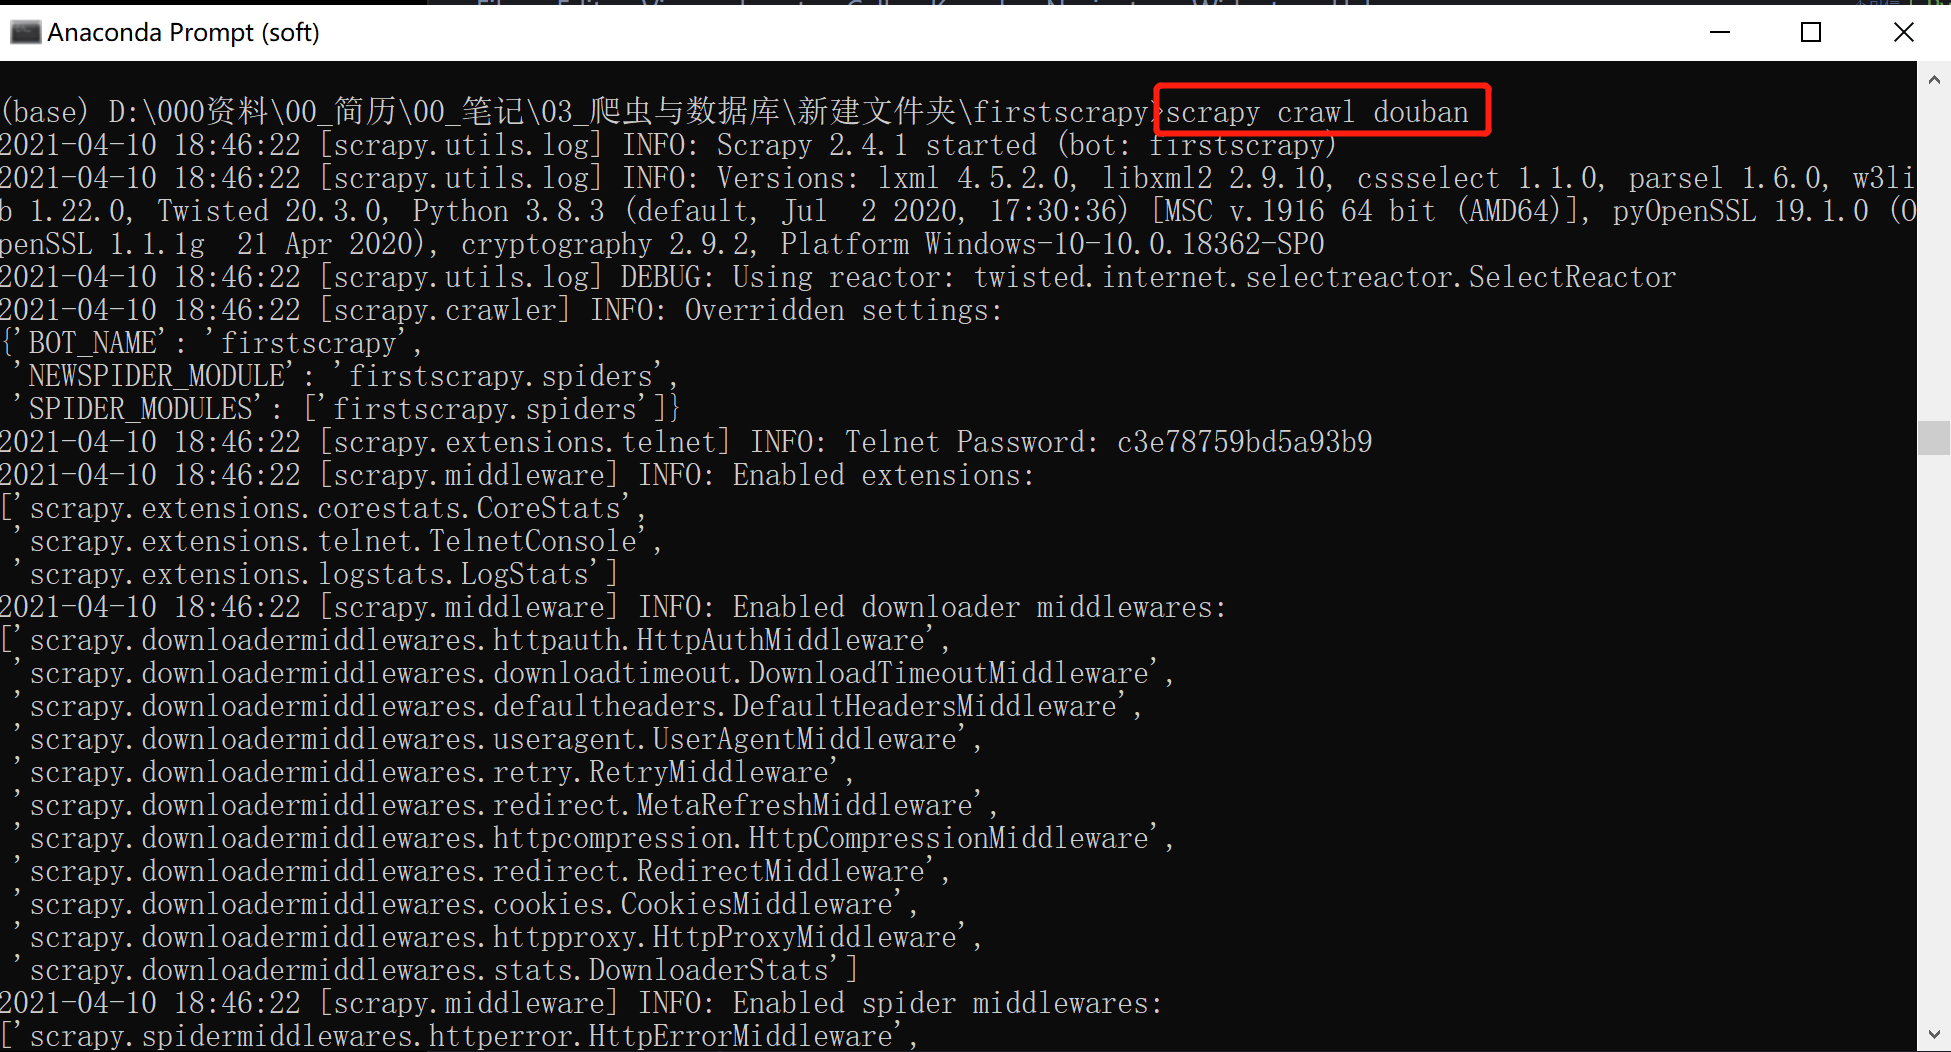

# 5. 蜘蛛爬多个网页数据

## 5.1 项目新增蜘蛛maoyan

① 在已有项目firstscrapy上新增爬虫maoyan蜘蛛（例如：scrapy genspider maoyan https://maoyan.com）。

② 此项目，代码跑通即可，知道如何在已有项目中添加新的蜘蛛即可。

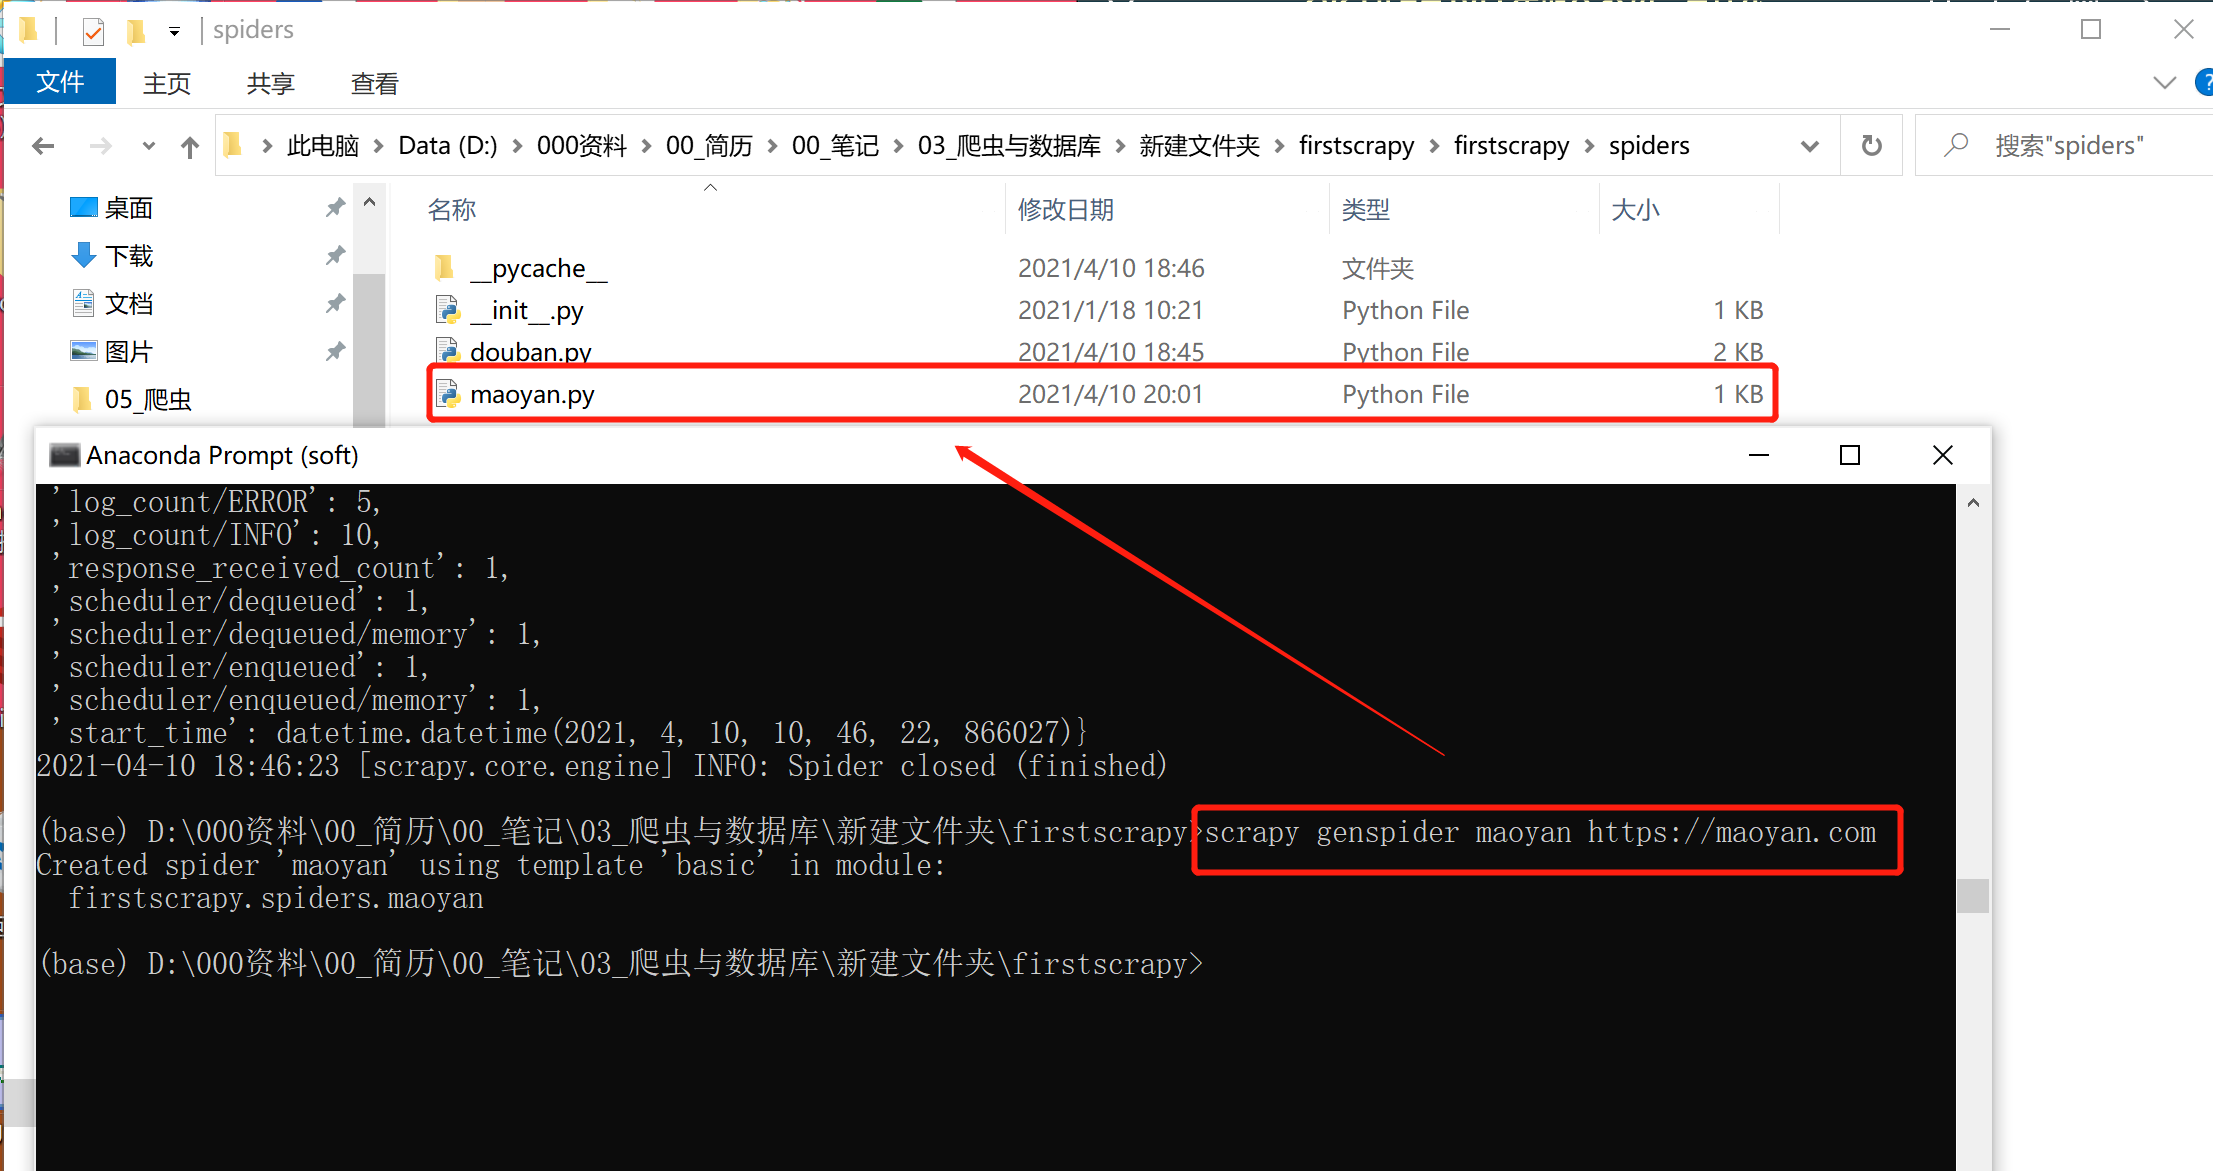

## 5.2 重新定义items.py文件

In [ ]:
# items.py文件(定义爬虫信息字段)
import scrapy

# 定义该Scrapy项目中item.py文件对应两个蜘蛛的类
class FirstscrapyItem(scrapy.Item):
    # 要爬哪些东西，字段
    id1 = scrapy.Field()  # 实例化对象，对象名是自己定义的
    title = scrapy.Field() # scrapy.Field()这个类继承的是字典类
    actors = scrapy.Field() 
    score = scrapy.Field()
    types = scrapy.Field()
    rank = scrapy.Field()
    release_date = scrapy.Field()
    cover_url = scrapy.Field()

# 爬取猫眼的蜘蛛和爬取豆瓣的蜘蛛都在一个项目下，公用一个items.py，但是maoyan.py、douban.py不一样    
class MaoYanItem(scrapy.Item):
    # 要爬哪些东西，字段
    name = scrapy.Field()  # 实例化对象，对象名是自己定义的
    actor = scrapy.Field() # scrapy.Field()这个类继承的是字典类
    time = scrapy.Field()
    score = scrapy.Field()

## 5.3 修改maoyan.py文件

In [ ]:
# 这是 maoyan.py 文件

import scrapy
from firstscrapy.items import MaoYanItem 

class MaoyanSpider(scrapy.Spider):
    name = 'maoyan'
    allowed_domains = ['https://maoyan.com']

    start_urls = ['https://maoyan.com/board/4?request=9e579471df583a19e02958b66f159afdiaked&offset=0']               
    
    # 解析数据
    def parse(self,response):
        movies = response.xpath('//*[@id="app"]/div/div/div[1]/d1/dd')  
        print('movies',movies)
        for movie in movies:
            data = MaoYanItem() # 实例化对象
            data['name'] = movie.xpath('./dive/div/div[1]/p[1]/a/text()').extract()[0]   
            data['actor'] = movie.xpath('./dive/div/div[1]/p[2]/a/text()').extract()[0] 
            data['time'] = movie.xpath('./dive/div/div[1]/p[3]/a/text()').extract()[0] 
            data['score'] = movie.xpath('./dive/div/div[2]/p/i[1]/a/text()')[0]                     
            yield data # yield会记录当前位置，然后接着爬，如果用return只有第一页数据

## 5.4 修改setting.py文件

In [ ]:
# setting.py 文件(设置爬虫配准)

BOT_NAME = 'firstscrapy'

SPIDER_MODULES = ['firstscrapy.spiders']
NEWSPIDER_MODULE = 'firstscrapy.spiders'

# Obey robots.txt rules
ROBOTSTXT_OBEY = False  # 为True表示遵守 ROBOST 协议，为False表示不遵守 ROBOST 协议
                        #  ROBOST 协议即别人不允许你爬的，你爬的话会自动报错。

DEFAULT_REQUEST_HEADERS = {
"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36",     
"Cookie":"__mta=20910855.1606637014443.1618057299727.1623928548180.32; _lxsdk_cuid=17613074aa0c8-086e1065518722-c791e37-fa000-17613074aa0c8; uuid_n_v=v1; uuid=6F2F6C70CF5911EBAB8E17FF409CD85151B829275B994428940F880E34AA8F0E; _csrf=bd0c02c613b9ed1a44b4b3c85cb83c4054b062dee719058d8295c6b05cfe6097; _lxsdk=6F2F6C70CF5911EBAB8E17FF409CD85151B829275B994428940F880E34AA8F0E; Hm_lvt_703e94591e87be68cc8da0da7cbd0be2=1623926858; __mta=20910855.1606637014443.1618057299727.1623926878946.32; Hm_lpvt_703e94591e87be68cc8da0da7cbd0be2=1623928548; _lxsdk_s=17a199562f7-6e6-ea5-30c%7C%7C11"   
}   
  
ITEM_PIPELINES = {
    'firstscrapy.pipelines.SaveTxt': 301, #  SaveTxt 为 douban.py 中的 item 要传入 pipelines.py 的类名
    'firstscrapy.pipelines.SaveCsv': 302, # 301,302数值为多少没有影响，但是谁大谁小有影响，数值小的，先运行，先进入该类
}

④ 在anaconda中运行scrapy crawl maoyan，由于没有配置pipeline.py()对maoyan.py里的数据进行保存，那么运行scrapy crawl maoyan，只会显示爬虫得到的数据。

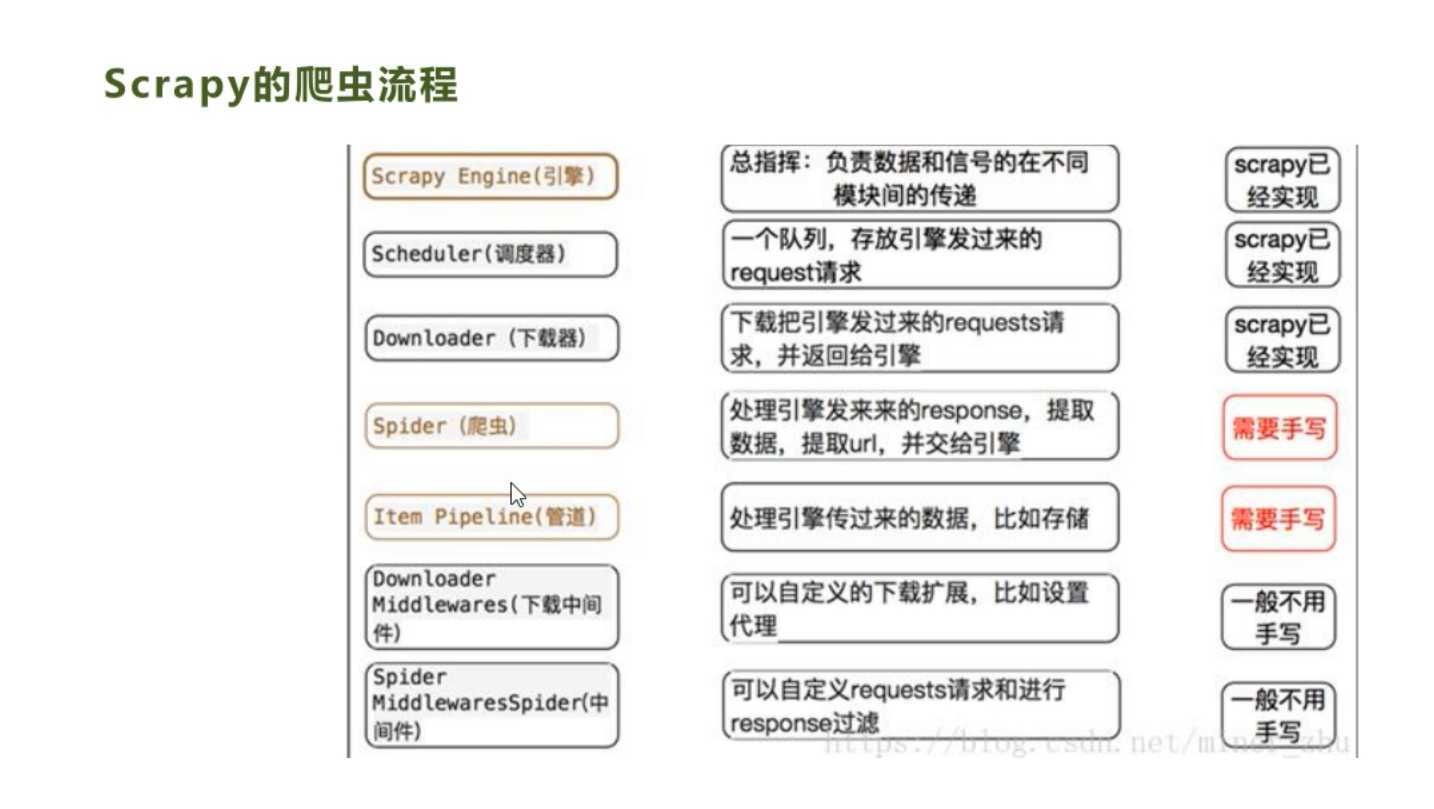

# 6. 爬取新闻数据

## 6.1 命令行创建爬虫news

① 进入命令行界面，进入想创建Scrapy项目的目录下。

② scrapy startproject 项目名（例如：scrapy startproject news），会创建一个scrapy项目。

③ cd firstscrapy，进入firstscrapy文件夹内。

④ scrapy genspider 蜘蛛名字 爬取网站域名（例如：scrapy genspider touzijie pe.pedaily.cn），会创建一个爬虫蜘蛛spider，并且会产生一系列文件。

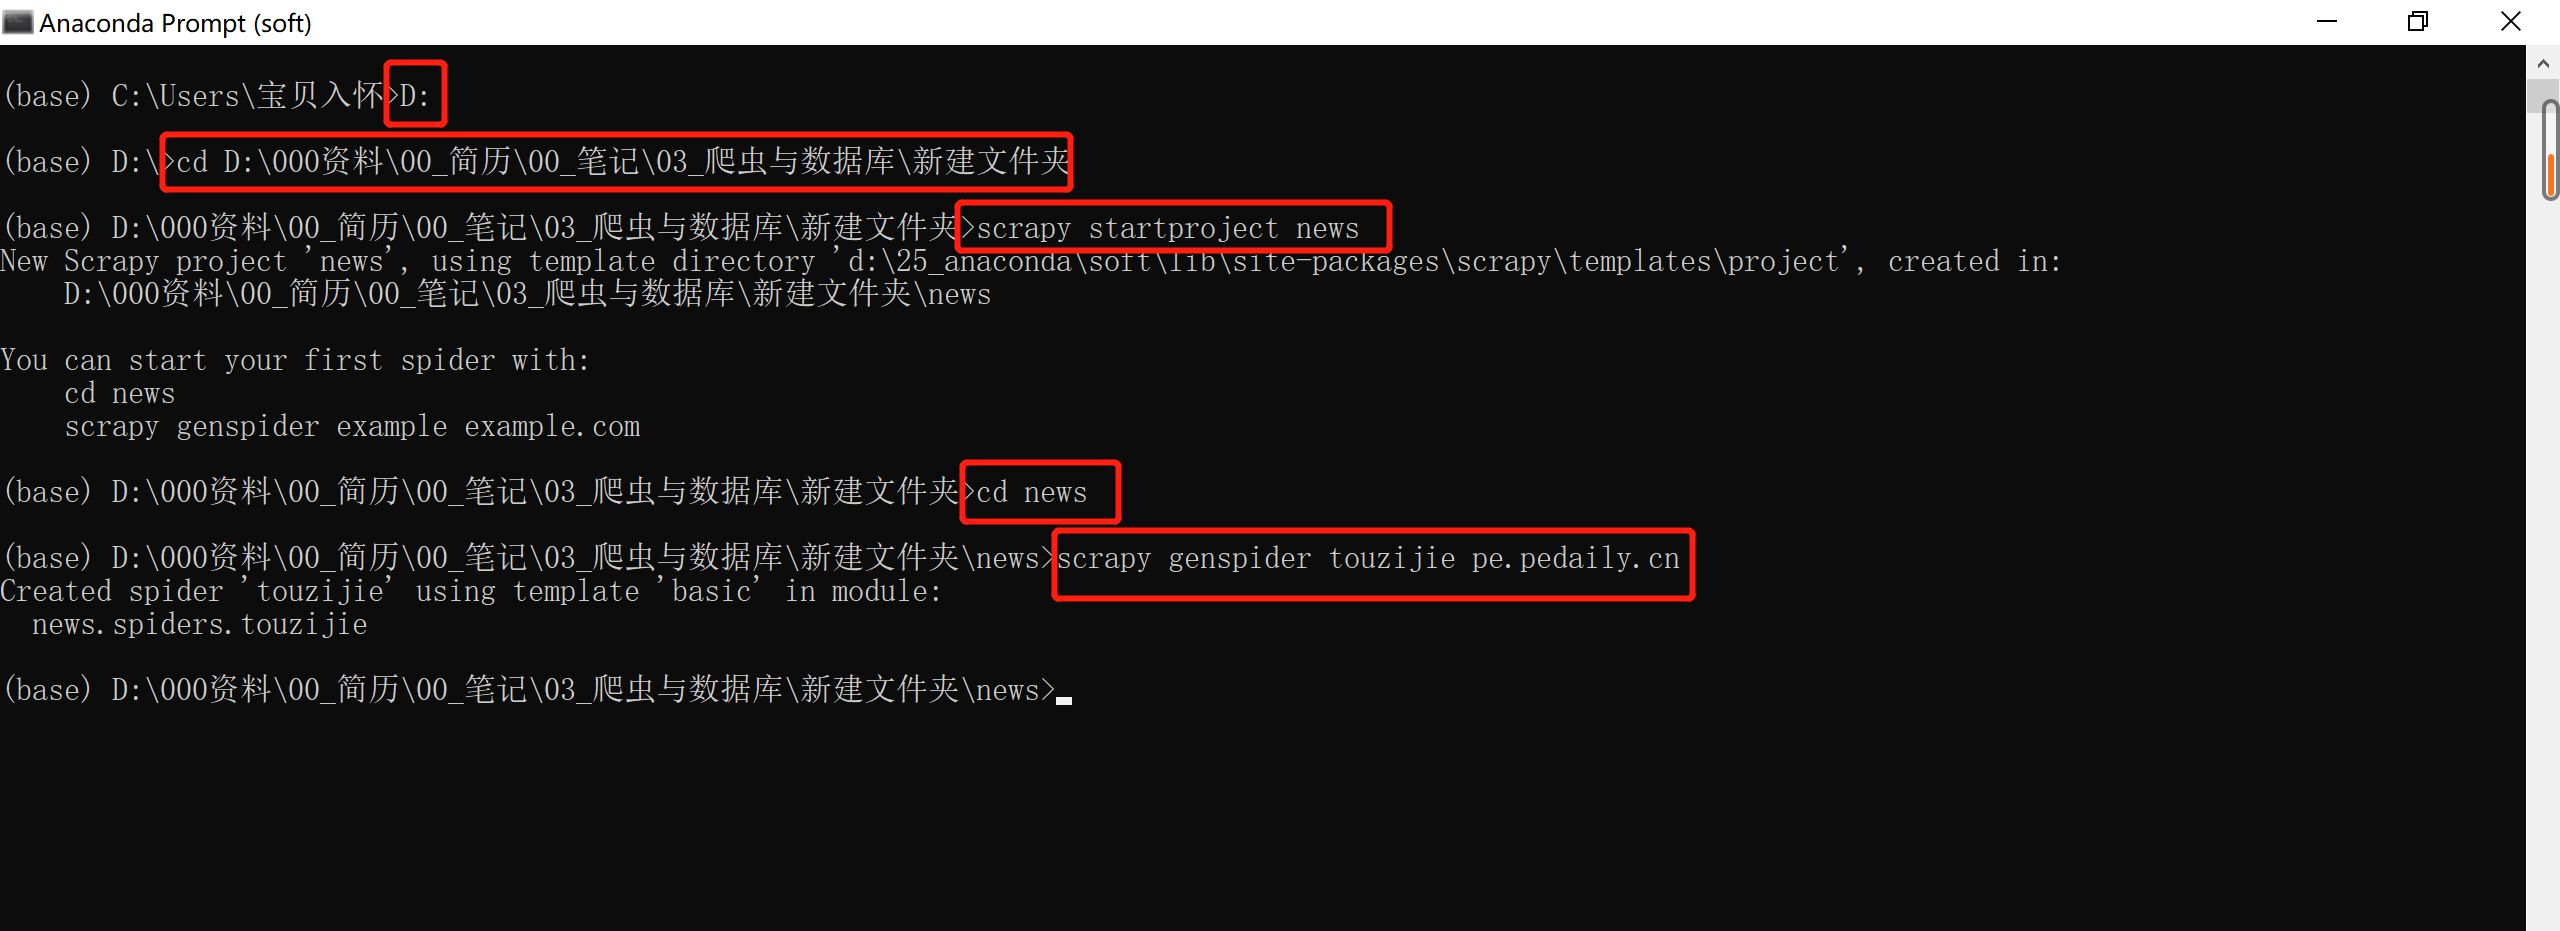

## 6.2 修改items.py文件

In [ ]:
import scrapy 
class NewsItem(scrapy.Item):
    title = scrapy.Field()
    new_url = scrapy.Field()
    abstract = scrapy.Field()
    new_type = scrapy.Field()
    date = scrapy.Field()
    image_url = scrapy.Field()

## 6.3 修改touzijie.py文件

### 6.3.1 列表推导式实现翻页

In [ ]:
#coding=utf-8
import scrapy 
from news.items import NewsItem

class TouzijieSpider(scrapy.Spider):
    name = 'touzijie'
    allowed_domains = ['pe.pedaily.cn']
    
    # 方法1：通过列表推导式，实现翻页
    start_urls = ['http://pe.pedaily.cn/vcpe/{}/'.format(page) for page in range(1,5)]
    
    def parse(self, response):
        news = response.xpath('//*[@id="newslist-all"]/li')
        for new in news:            
            new_item = NewsItem()
            new_item['title'] = new.xpath('./div[2]/h3/a/text()').extract_first()     
            new_item['new_url'] = new.xpath('./div[2]/h3/a/@href').extract_first()                        
            new_item['abstract'] = new.xpath('./div[2]/div[1]/text()').extract_first()       
            new_types = new.xpath('./div[2]/div[2]/a')    
            new_item['new_type'] = ','.join([types.xpath('./text()').extract_first() for types in new_types])               
            #','.join(['a','b','c']) 会使得列表中的元素以逗号','拼接在一起，变成'a,b,c'
            # 如果用.extract()[0]来提取，没有后接[0]为列表的形式，有[0]就是提取列表中的字符串元素
            new_item['date'] = new.xpath('./div[2]/div[2]/span/text()').extract_first()    
            new_item['image_url'] = new.xpath('./div[1]/a/img/@src').extract_first()  
            yield new_item

### 6.3.2 字符串替换实现翻页

In [ ]:
#coding=utf-8
import scrapy 
from news.items import NewsItem
import re
import os

class TouzijieSpider(scrapy.Spider):
    name = 'touzijie'
    allowed_domains = ['pe.pedaily.cn']
    
    # 方法2：字符串替换实现翻页
    start_urls = ['https://pe.pedaily.cn/vcpe/1/']
    page = 1  # 类属性 用self.page 调用

    dir_name = r'.\content'
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        
    def parse(self, response):
        news = response.xpath('//*[@id="newslist-all"]/li')
        for new in news:
            new_item = NewsItem()
            new_item['title'] = new.xpath('./div[2]/h3/a/text()').extract_first()     
            new_item['new_url'] = new.xpath('./div[2]/h3/a/@href').extract_first()                        
            new_item['abstract'] = new.xpath('./div[2]/div[1]/text()').extract_first()       
            new_types = new.xpath('./div[2]/div[2]/a')    
            new_item['new_type'] = ','.join([types.xpath('./text()').extract_first() for types in new_types])               
            new_item['date'] = new.xpath('./div[2]/div[2]/span/text()').extract_first()    
            new_item['image_url'] = new.xpath('./div[1]/a/img/@src').extract_first()  
            if new_item['new_url']:
                yield scrapy.Request(url=new_item['new_url'],callback=self.parse_content)
            yield new_item
        print('当前的url：',response.url)
        # response.url中self.page字符串替换为self.page+1字符串
        # 例如字符串1替换为字符串2
        next_url = response.url.replace(str(self.page),str(self.page+1))  #类属性要用self去调用           
        print('下一页url：',next_url)
        self.page += 1
        if self.page>100:
            pass
        else:
            yield scrapy.Request(url=next_url,callback=self.parse)
            
    def parse_content(self,response):
        file_name = re.findall('https://pe.pedaily.cn/\d{6}/(\d*?).shtml',response.url) 
        if file_name:
            file_name = file_name[0]+'.txt'
        file_path = os.path.join(self.dir_name,file_name)
        duanluos = response.xpath('//*[@id="news-content"]/p')
        if duanluos:
            content = '\n'.join([duanluo.xpath('./text()').extract_first() for duanluo in duanluos if duanluo.xpath('./text()').extract_first()])
        with open(file_path,'a',encoding='utf-8') as f:
            f.write(content)  

## 6.4 修改setting.py文件

In [ ]:
# 这是setting.py 文件(设置爬虫配准)

BOT_NAME = 'news'

SPIDER_MODULES = ['news.spiders']
NEWSPIDER_MODULE = 'news.spiders'

# Obey robots.txt rules
ROBOTSTXT_OBEY = False  # 为True表示遵守 ROBOST 协议，为False表示不遵守 ROBOST 协议
                        # ROBOST 协议即别人不允许你爬的，你爬的话会自动报错。

DEFAULT_REQUEST_HEADERS = {
"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36"
}
# 这里用的是豆瓣头文件覆盖的原内容

ITEM_PIPELINES = {
    'news.pipelines.NewsPipeline': 300, 
    'news.pipelines.MysqlPipeline': 301, 
}

## 6.5 修改pipelines.py文件

In [ ]:
#coding=utf-8
from itemadapter import ItemAdapter
from news.mysql_operater import PythonMysql # mysql_operater.py 在news文件夹下
import csv 

class NewsPipeline:
    def __init__(self):
        self.filename = 'news.csv'
        
    def process_item(self,item,spider):    
        self.write_csv(item)
        return item
    
    def write_csv(self,dictdata):
        with open(self.filename,'a',encoding='utf-8-sig',newline='') as csvf:             
            fieldnames = ['title','new_url','abstract','new_type','date','image_url']        
            writer = csv.DictWriter(csvf,fieldnames=fieldnames)                                  
            writer.writerow(dictdata)   
        
class MysqlPipeline:
    def __init__(self):
        self.mysql = PythonMysql(host='localhost',user='root',password='password',port=3306)                  
        self.create_sql = '''
                          create table if not exists ai.news_data
                           (
                           title varchar(500) comment '新闻名',   
                           new_url varchar(100) comment '新闻链接',
                           abstract text comment '摘要',
                           new_type varchar(150) comment '新闻类型',
                           date varchar(100) comment '新闻发布日期',
                           image_url varchar(100) comment '图片链接'
                           )
                          '''
        self.mysql.create_table(self.create_sql) # 在初始化中创建表
        
    def process_item(self,item,spider):
        insert_sql = '''
                     insert into ai.news_data values('{}','{}','{}','{}','{}','{}')
                     '''                                 
        insert_sql = insert_sql.format(item['title'],
                                       item['new_url'],
                                       item['abstract'],
                                       item['new_type'],
                                       item['date'],
                                       item['image_url'])
        self.mysql.insert_mysql(insert_sql)
        return item        

## 6.6 增添mysql_operater.py文件

In [ ]:
#coding=utf-8
import pymysql
class PythonMysql(object):
    # 构造方法
    def __init__(self,host,user,password,port):
        self.host = host
        self.user = user
        self.password = password
        self.port = port
        self.mysql_db = self.connect_mysql()
    
    # 连接数据库
    def connect_mysql(self):
        try:
            mysql_db = pymysql.connect(host=self.host,
                                       user=self.user,
                                       password=self.password,
                                       port=self.port)
            print('数据库连接成功')
            return mysql_db
        except Exception as e:
            print(e)
            print('数据库连接失败')
            return None
        
    # 创建表
    def create_table(self,create_table_sql):
        try:
            cursor =  self.mysql_db.cursor()
            cursor.execute(create_table_sql)
            print('创建表成功')
        except Exception as e:
            print(e)
            print('创建表失败')
            
    # 查询数据
    def select_mysql(self,qurey_sql):
        cursor =  self.mysql_db.cursor()
        cursor.execute(qurey_sql)
        return self.mysql_db.cursor.fetchall()
    
    # 插入数据
    def insert_mysql(self,insert_sql):
        try:
            cursor =  self.mysql_db.cursor()
            cursor.execute(insert_sql)  # 执行插入语句
            self.mysql_db.commit() # commit方法跟在增删改查后面，意味着把语句提交给数据库
        except Exception as e:
            print(e)
            print(insert_sql)
            self.mysql_db.rollback()